<a href="https://colab.research.google.com/github/T33mac/colab-projects/blob/master/PCA_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Principal Component Analysis


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1. Load Dataset 

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# 2. Plot Equalized Scatterplot

(0.6829999999999998, 53.197, 0.55, 10.450000000000001)

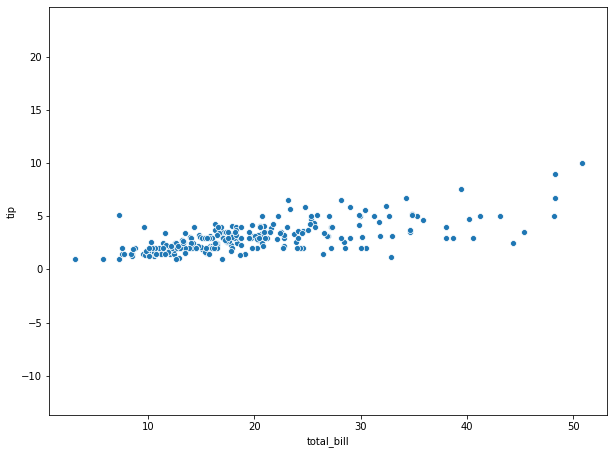

In [3]:
fig = plt.figure(figsize=(10, 7.5))
ax = sns.scatterplot(x='total_bill', y='tip', data=tips)

plt.axis('equal')

# 3. Set Variables and Compute PCA

In [0]:
arr = tips[['total_bill', 'tip']].values
arr = StandardScaler().fit_transform(arr)

In [5]:
pca = PCA(n_components=2)
pca.fit(arr)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [6]:
print(f'PCA Components: \n {pca.components_} \n')
print(f'PCA Explained Variance: \n {pca.explained_variance_} \n')
print(f'PCA Explained Variance Ratio: \n {pca.explained_variance_ratio_} \n')

PCA Components: 
 [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]] 

PCA Explained Variance: 
 [1.68263013 0.32560032] 

PCA Explained Variance Ratio: 
 [0.83786705 0.16213295] 



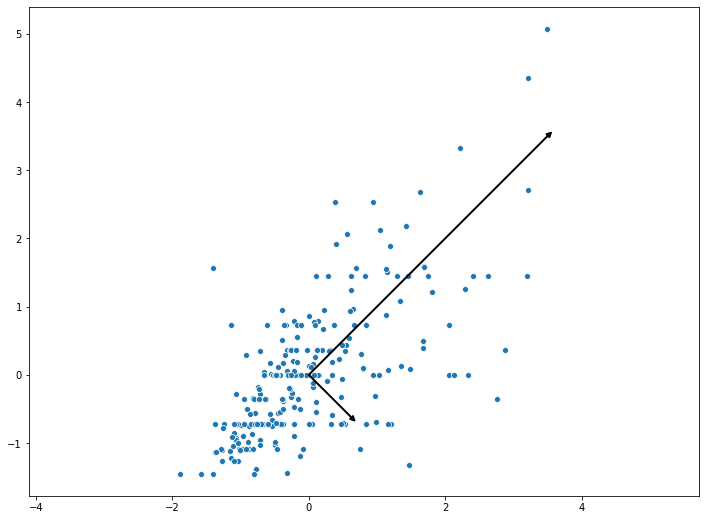

In [9]:
fig = plt.figure(figsize=(12, 9))
sns.scatterplot(x=arr[:, 0], y=arr[:, 1])

for length, vector in zip(pca.explained_variance_, pca.components_):
  v = vector * 3 * length
  ax = plt.gca()
  ax.annotate('', pca.mean_ + v, pca.mean_, arrowprops=dict(arrowstyle='-|>',
                                                            linewidth=2,
                                                            shrinkA=0,
                                                            shrinkB=0
                                                            ))
  plt.axis('equal')